<a href="https://colab.research.google.com/github/inamdarmihir/researchdocs/blob/main/SemEval2013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

**Importing Data**

In [8]:
df = pd.read_csv('semeval2013.csv')


**Preprocessing the data**

In [9]:
#removes pattern in the input text
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for word in r:
    input_txt = re.sub(word, "", input_txt)
  return input_txt

In [10]:
# removing twitter handles (@user)
df['clean_text'] = np.vectorize(remove_pattern)(df['text'], "#[\w]*")

# remove special characters, numbers and punctuations
df['clean_text'] = df['clean_text'].str.replace("[^a-zA-Z]", " ")

# remove special characters, numbers and punctuations
df['clean_text'] = df['clean_text'].str.replace("\s+", " ")

# remove short words
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

df.head()

,label,text,clean_text
0,1,One Night like In Vegas I make dat Nigga Famous,Night like Vegas make Nigga Famous
1,1,Walking through Chelsea at this time of day is...,Walking through Chelsea this time rather lovel...
2,0,"And on the very first play of the night, Aaron...",very first play night Aaron Rodgers UDFA Brand...
3,0,"Drove the bike today, about 40 miles. Felt lik...",Drove bike today about miles Felt like carrey ...
4,-1,looking at the temp outside....hpw did it get ...,looking temp outside hotter goes down Feel lik...


In [11]:
# individual words considered as tokens
tokenized_text = df['clean_text'].apply(lambda x: x.split())

# stem the words
from nltk.stem.porter import PorterStemmer
stemmer  = PorterStemmer()

tokenized_text = tokenized_text.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_text.head()

0              [night, like, vega, make, nigga, famou]
1    [walk, through, chelsea, thi, time, rather, lo...
2    [veri, first, play, night, aaron, rodger, udfa...
3    [drove, bike, today, about, mile, felt, like, ...
4    [look, temp, outsid, hotter, goe, down, feel, ...
Name: clean_text, dtype: object

In [12]:
# combine words into single sentence
for i in range(len(tokenized_text)):
  tokenized_text[i] = " ".join(tokenized_text[i])

df['clean_text'] = tokenized_text
df.head()

,label,text,clean_text
0,1,One Night like In Vegas I make dat Nigga Famous,night like vega make nigga famou
1,1,Walking through Chelsea at this time of day is...,walk through chelsea thi time rather love love...
2,0,"And on the very first play of the night, Aaron...",veri first play night aaron rodger udfa brandi...
3,0,"Drove the bike today, about 40 miles. Felt lik...",drove bike today about mile felt like carrey m...
4,-1,looking at the temp outside....hpw did it get ...,look temp outsid hotter goe down feel like veg...


In [15]:
import nltk
nltk.download('stopwords')
  
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
import nltk
nltk.download('punkt')

word_frequencies = {}
for word in nltk.word_tokenize('clean_text'):
  if word not in stopwords:
    if word not in word_frequencies:
      word_frequencies[word] = 1
    else:
      word_frequencies[word] += 1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [17]:
maximum_frequency = max(word_frequencies.values())
for word in word_frequencies:
  word_frequencies[word] = word_frequencies[word] / maximum_frequency

**Exploratory Data Analysis**

In [18]:
 #!pip install wordcloud

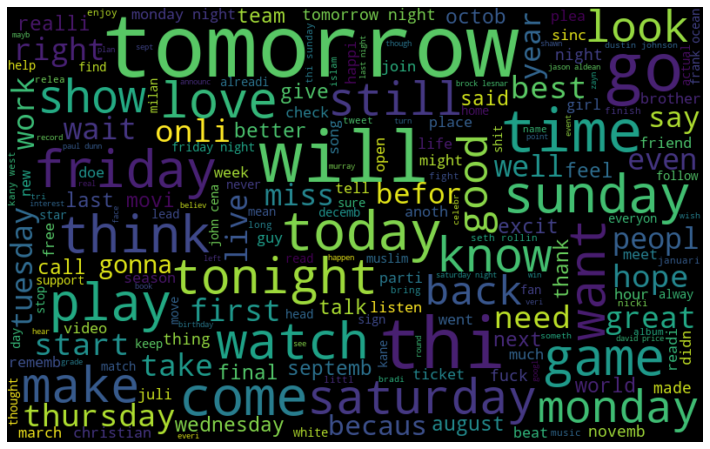

In [19]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_text']])

from wordcloud import WordCloud
wordcloud =   WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the figure
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

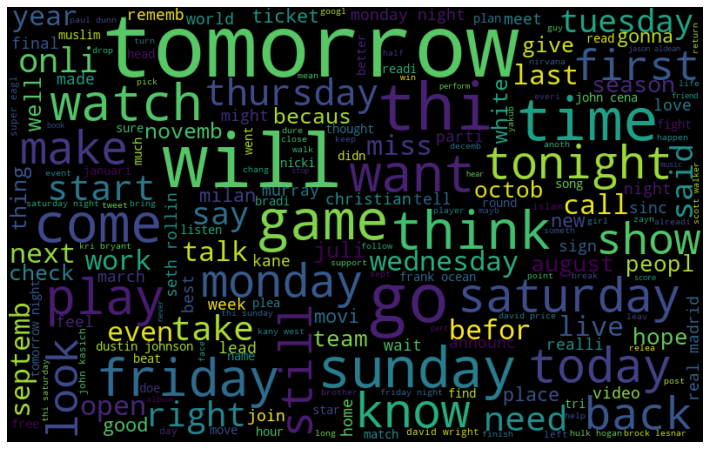

In [20]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_text'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the figure
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

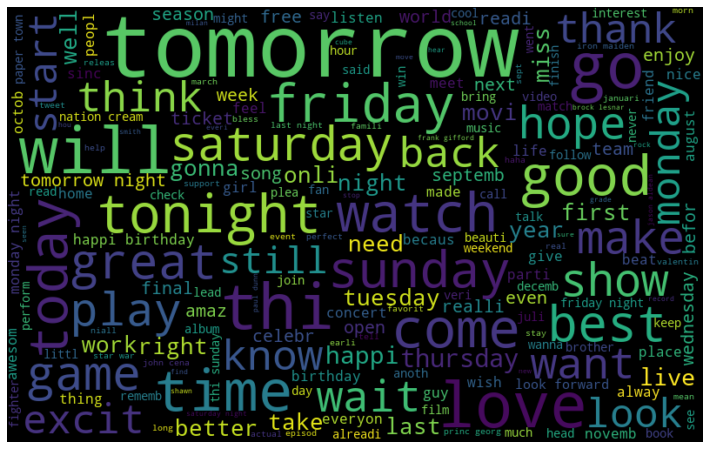

In [21]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_text'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the figure
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Input Split**

In [22]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_text'])

In [ ]:
 bow[0].toarray()


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25 )

**Model Training**

In [25]:
maxlen = 50

model = tf.keras.Sequential([
        tf.keras.layers.Embedding(10000, 16, input_length= maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6, activation='softmax')
]) 
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


In [26]:
numDimensions = 300
maxSeqLength = 250
batchSize = 24
lstmUnits = 64
numClasses = 2
iterations = 100000